# Required Libraries

In [100]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report,confusion_matrix
import warnings
warnings.filterwarnings('ignore')


# Data analysis

In [103]:
dataset=pd.read_csv("shipping.csv")
df=dataset.copy()

In [3]:
df.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [4]:
df.shape

(10999, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [6]:
def grab_col_names(dataframe,cat_th=10,car_th=20):
    cat_cols=[col for col in dataframe.columns if dataframe[col].dtypes=="O"] #tipi obcejt olanları al
    num_but_cat=[col for col in dataframe.columns if dataframe[col].nunique()<cat_th and
             dataframe[col].dtypes!="O"] #numerik görünen kategörikleri aldık
    cat_but_car=[col for col in dataframe.columns if dataframe[col].nunique()>car_th and
                dataframe[col].dtypes=="O"] #kategorik görünen kardinalleri aldık.

    cat_cols=cat_cols+num_but_cat #kategörikler güncellendi
    cat_cols=[col for col in cat_cols if col not in cat_but_car] #cat_cols içinde kardinalleri ayırdık

    num_cols=[col for col in dataframe.columns if dataframe[col].dtypes!="O"] #tipi objectden farkı olanları getir
    num_cols=[col for col in num_cols if col not in num_but_cat]

    print(f"Observations(Gözlem):{dataframe.shape[0]}")
    print(f"Variables(Öznitelik): {dataframe.shape[1]}")
    print(f"cat_cols:{len(cat_cols)}")
    print(f"num_cols:{len(num_cols)} ")
    print(f"cat_but_car:{len(cat_but_car)} ")
    print(f"num_but_cat:{len(num_but_cat)} ")

    return cat_cols,num_cols,cat_but_car

In [109]:
cat_cols,num_cols,cat_but_car=grab_col_names(df)

Observations(Gözlem):10999
Variables(Öznitelik): 12
cat_cols:8
num_cols:4 
cat_but_car:0 
num_but_cat:4 


In [8]:
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [110]:
num_cols

['ID', 'Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms']

In [10]:
cat_cols

['Warehouse_block',
 'Mode_of_Shipment',
 'Product_importance',
 'Gender',
 'Customer_care_calls',
 'Customer_rating',
 'Prior_purchases',
 'Reached.on.Time_Y.N']

In [11]:
df[["Warehouse_block", "Reached.on.Time_Y.N"]].groupby(["Warehouse_block"], as_index=False).mean().sort_values(by='Reached.on.Time_Y.N', ascending=False)

,Warehouse_block,Reached.on.Time_Y.N
1,B,0.602291
4,F,0.598472
3,D,0.597601
2,C,0.596836
0,A,0.586470


In [12]:
df[["Mode_of_Shipment", "Reached.on.Time_Y.N"]].groupby(["Mode_of_Shipment"], as_index=False).mean().sort_values(by='Reached.on.Time_Y.N', ascending=False)

,Mode_of_Shipment,Reached.on.Time_Y.N
0,Flight,0.601576
2,Ship,0.597561
1,Road,0.588068


In [13]:
df[["Product_importance", "Reached.on.Time_Y.N"]].groupby(["Product_importance"], as_index=False).mean().sort_values(by="Reached.on.Time_Y.N", ascending=False)

,Product_importance,Reached.on.Time_Y.N
0,high,0.649789
1,low,0.592788
2,medium,0.590450


In [14]:
df[["Gender", "Reached.on.Time_Y.N"]].groupby(["Gender"], as_index=False).mean().sort_values(by="Reached.on.Time_Y.N", ascending=False)

,Gender,Reached.on.Time_Y.N
1,M,0.599010
0,F,0.594409


In [15]:
df[["Customer_care_calls", "Reached.on.Time_Y.N"]].groupby(["Customer_care_calls"], as_index=False).mean().sort_values(by="Reached.on.Time_Y.N", ascending=False)

,Customer_care_calls,Reached.on.Time_Y.N
0,2,0.652038
1,3,0.625117
2,4,0.597695
3,5,0.584192
4,6,0.516288
5,7,0.516260


In [16]:
df[["Customer_rating", "Reached.on.Time_Y.N"]].groupby(["Customer_rating"], as_index=False).mean().sort_values(by="Reached.on.Time_Y.N", ascending=False)

,Customer_rating,Reached.on.Time_Y.N
4,5,0.606633
2,3,0.606074
3,4,0.595249
1,2,0.587991
0,1,0.587472


In [17]:
df[["Prior_purchases", "Reached.on.Time_Y.N"]].groupby(["Prior_purchases"], as_index=False).mean().sort_values(by="Reached.on.Time_Y.N", ascending=False)

,Prior_purchases,Reached.on.Time_Y.N
5,7,0.676471
6,8,0.648438
1,3,0.640708
0,2,0.625240
7,10,0.573034
4,6,0.559715
2,4,0.543387
3,5,0.498834


## Data Visualisation

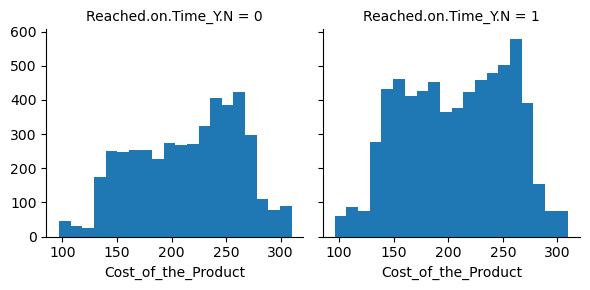

In [18]:
g = sns.FacetGrid(df, col="Reached.on.Time_Y.N")
g.map(plt.hist, "Cost_of_the_Product", bins=20)

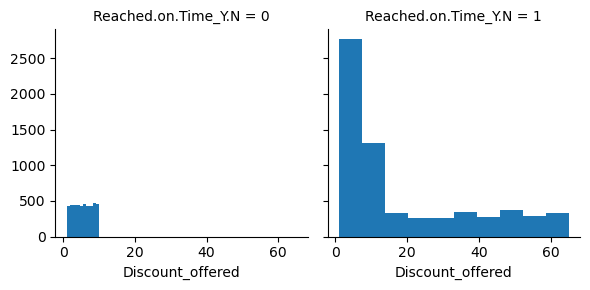

In [19]:
g = sns.FacetGrid(df, col="Reached.on.Time_Y.N")
g.map(plt.hist, "Discount_offered", bins=10)

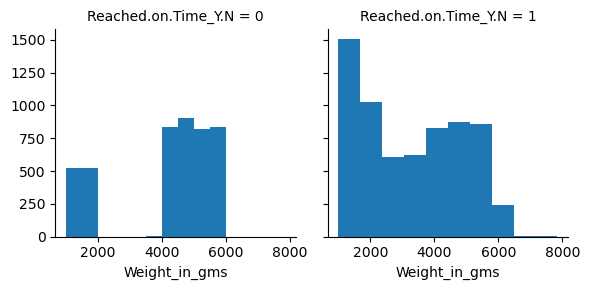

In [20]:
g = sns.FacetGrid(df, col="Reached.on.Time_Y.N")
g.map(plt.hist, "Weight_in_gms", bins=10)

                     Cost_of_the_Product  Discount_offered  Weight_in_gms
Reached.on.Time_Y.N                                                      
0                             214.498647          5.545987    4168.668395
1                             207.289197         18.663721    3272.640104


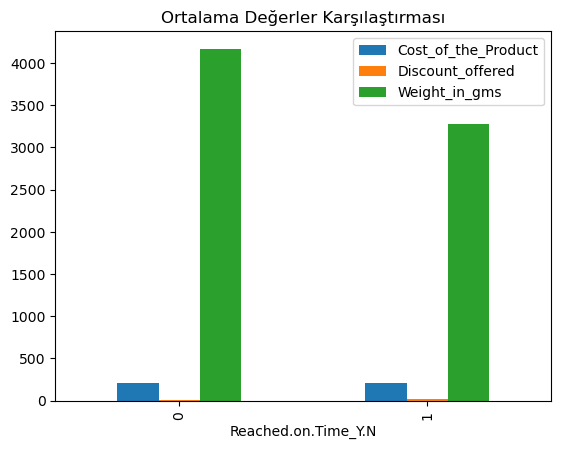

In [101]:
grouped_averages = df.groupby(["Reached.on.Time_Y.N"])[["Cost_of_the_Product", "Discount_offered", "Weight_in_gms"]].mean()

print(grouped_averages)

grouped_averages.plot(kind="bar")
plt.title("Ortalama Değerler Karşılaştırması")
plt.show()

<Axes: xlabel='Reached.on.Time_Y.N', ylabel='Cost_of_the_Product'>

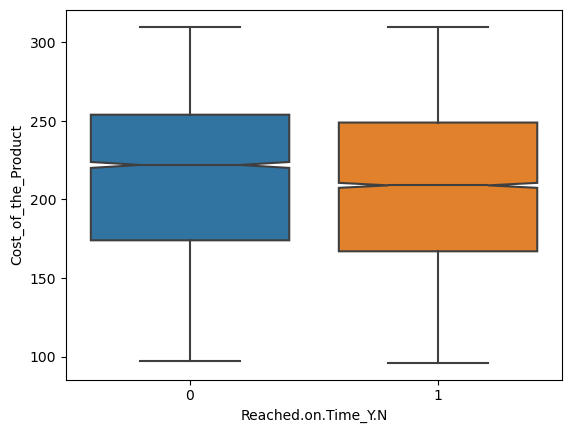

In [22]:
sns.boxplot(x="Reached.on.Time_Y.N", y="Cost_of_the_Product", data=df, notch=True)

<Axes: xlabel='Reached.on.Time_Y.N', ylabel='Discount_offered'>

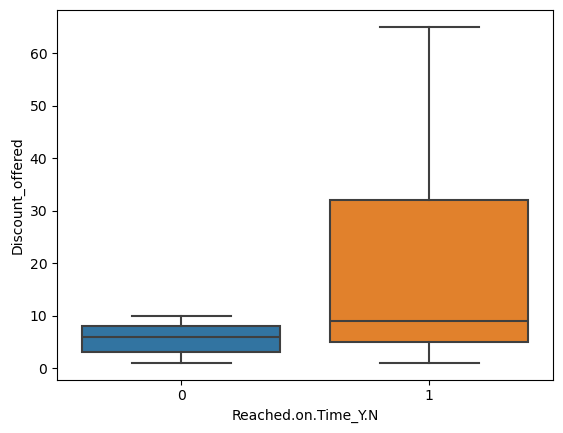

In [23]:
sns.boxplot(x="Reached.on.Time_Y.N", y="Discount_offered", data=df)

<Axes: xlabel='Reached.on.Time_Y.N', ylabel='Weight_in_gms'>

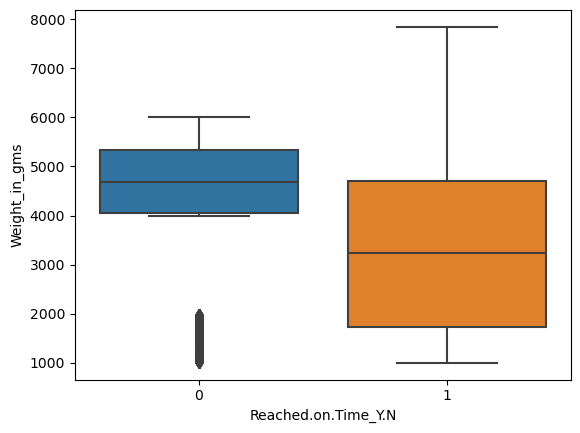

In [24]:
sns.boxplot(x="Reached.on.Time_Y.N", y="Weight_in_gms", data=df)

<Axes: >

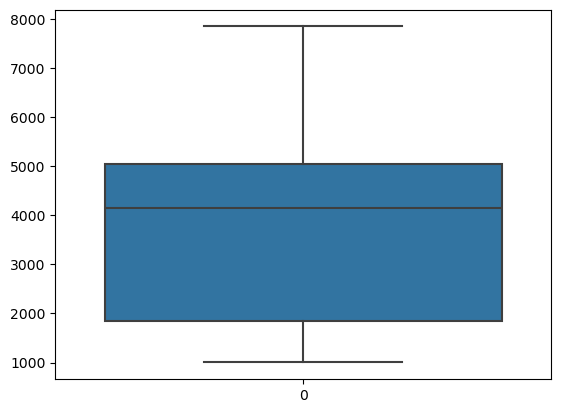

In [25]:
sns.boxplot(data=df["Weight_in_gms"])

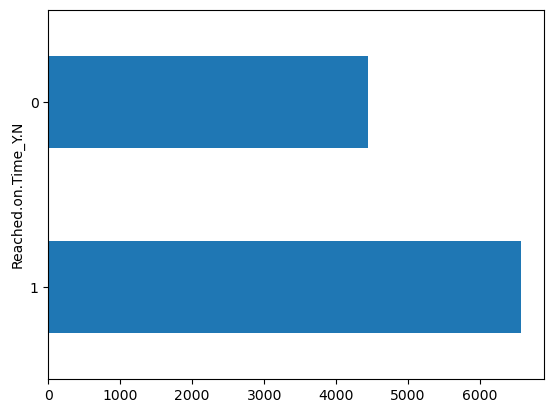

In [26]:
df["Reached.on.Time_Y.N"].value_counts().plot.barh();

<Axes: xlabel='Cost_of_the_Product', ylabel='Density'>

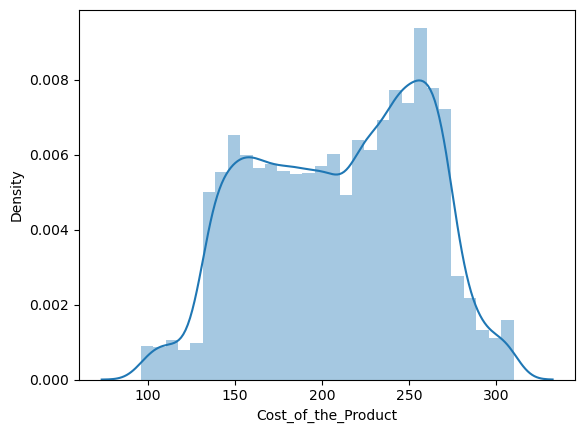

In [27]:
sns.distplot(df["Cost_of_the_Product"])

In [115]:
num_cols.append("Reached.on.Time_Y.N")
correlation_matrix = df[num_cols].corr()
correlation_matrix["Reached.on.Time_Y.N"]

ID                    -0.411822
Cost_of_the_Product   -0.073587
Discount_offered       0.397108
Weight_in_gms         -0.268793
Reached.on.Time_Y.N    1.000000
Name: Reached.on.Time_Y.N, dtype: float64

# Data Preprossesing

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [29]:
encoder=LabelEncoder()
df["Gender_encoded"]=encoder.fit_transform(df["Gender"])

In [30]:
print(encoder.inverse_transform([0,1]))  #kim 0 kim 1 sorusuna cevap

['F' 'M']


In [31]:
df["Product_importance"].value_counts()

Product_importance
low       5297
medium    4754
high       948
Name: count, dtype: int64

In [32]:
importance_mapping = {'low': 0, 'medium': 1, 'high': 2}
df['Product_importance_encoded'] = df['Product_importance'].map(importance_mapping)

In [33]:
df["Mode_of_Shipment"].value_counts()

Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64

In [34]:
importance_mapping = {'Road': 0, 'Ship': 1, 'Flight': 2}
df["Mode_of_Shipment_encoded"] = df["Mode_of_Shipment"].map(importance_mapping)

In [35]:
df["Warehouse_block"].value_counts()

Warehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: count, dtype: int64

In [36]:
importance_mapping = {'A': 0, 'B': 1, 'C': 2, "D":3, "F":4}
df["Warehouse_block_encoded"] = df["Warehouse_block"].map(importance_mapping)

In [37]:
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Gender_encoded,Product_importance_encoded,Mode_of_Shipment_encoded,Warehouse_block_encoded
0,1,D,Flight,4,2,177,3,low,F,44,1233,1,0,0,2,3
1,2,F,Flight,4,5,216,2,low,M,59,3088,1,1,0,2,4
2,3,A,Flight,2,2,183,4,low,M,48,3374,1,1,0,2,0
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1,1,1,2,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1,0,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1,0,1,1,0
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0,0,1,1,1
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0,0,0,1,2
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0,1,1,1,4


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          10999 non-null  int64 
 1   Warehouse_block             10999 non-null  object
 2   Mode_of_Shipment            10999 non-null  object
 3   Customer_care_calls         10999 non-null  int64 
 4   Customer_rating             10999 non-null  int64 
 5   Cost_of_the_Product         10999 non-null  int64 
 6   Prior_purchases             10999 non-null  int64 
 7   Product_importance          10999 non-null  object
 8   Gender                      10999 non-null  object
 9   Discount_offered            10999 non-null  int64 
 10  Weight_in_gms               10999 non-null  int64 
 11  Reached.on.Time_Y.N         10999 non-null  int64 
 12  Gender_encoded              10999 non-null  int32 
 13  Product_importance_encoded  10999 non-null  in

In [39]:
df.drop(["ID","Warehouse_block","Mode_of_Shipment","Product_importance","Gender"],axis=1,inplace=True)
df

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,Gender_encoded,Product_importance_encoded,Mode_of_Shipment_encoded,Warehouse_block_encoded
0,4,2,177,3,44,1233,1,0,0,2,3
1,4,5,216,2,59,3088,1,1,0,2,4
2,2,2,183,4,48,3374,1,1,0,2,0
3,3,3,176,4,10,1177,1,1,1,2,1
4,2,2,184,3,46,2484,1,0,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...
10994,4,1,252,5,1,1538,1,0,1,1,0
10995,4,1,232,5,6,1247,0,0,1,1,1
10996,5,4,242,5,4,1155,0,0,0,1,2
10997,5,2,223,6,2,1210,0,1,1,1,4


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Customer_care_calls         10999 non-null  int64
 1   Customer_rating             10999 non-null  int64
 2   Cost_of_the_Product         10999 non-null  int64
 3   Prior_purchases             10999 non-null  int64
 4   Discount_offered            10999 non-null  int64
 5   Weight_in_gms               10999 non-null  int64
 6   Reached.on.Time_Y.N         10999 non-null  int64
 7   Gender_encoded              10999 non-null  int32
 8   Product_importance_encoded  10999 non-null  int64
 9   Mode_of_Shipment_encoded    10999 non-null  int64
 10  Warehouse_block_encoded     10999 non-null  int64
dtypes: int32(1), int64(10)
memory usage: 902.4 KB


# Data Modelling

In [41]:
def model_performance(y_train, y_pred):

    y_actual = pd.Series(y_train, name="Actual")
    y_predicted = pd.Series(y_pred, name="Predicted")


    print(confusion_matrix(y_actual,y_predicted))
    print(classification_report(y_actual,y_predicted))

    print("Model Accuracy: ", accuracy_score(y_actual, y_predicted))
    print("Model Precision: ",precision_score(y_actual, y_predicted))
    print("Model Recall: ",recall_score(y_actual, y_predicted))
    acc = accuracy_score(y_actual, y_predicted)
    prec = precision_score(y_actual, y_predicted)
    rec = recall_score(y_actual, y_predicted)
    return acc, prec, rec

In [42]:
x=df.drop("Reached.on.Time_Y.N",axis=1)
y=df["Reached.on.Time_Y.N"]

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=70)

In [44]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(7699, 10)
(3300, 10)
(7699,)
(3300,)


### Logistic Regression

In [81]:
log_model=LogisticRegression()
log_model.fit(x_train,y_train)

LogisticRegression()

In [82]:
print(log_model.intercept_)
print(log_model.coef_)

[0.00900983]
[[-0.02377166  0.06164069  0.00014112 -0.06502166  0.12198267 -0.000173
   0.00748235  0.02586503  0.01694887  0.01721867]]


In [83]:
y_pred=log_model.predict(x_test)
log_acc,log_prec,log_rec=model_performance(y_test,y_pred)

Predicted    0    1
Actual             
0            8   15
1          423  520
[[ 773  588]
 [ 631 1308]]
Model Accuracy:  0.6306060606060606
Model Precision:  0.689873417721519
Model Recall:  0.6745745229499742


In [84]:
cross_val_score(log_model,x_test,y_test,cv=10).mean()

0.6293939393939394

### Gaussian Naive Bayes

In [78]:
naive_model=GaussianNB()
naive_model.fit(x_train,y_train)

GaussianNB()

In [79]:
y_pred=naive_model.predict(x_test)
gnaive_acc,gnaive_prec,gnaive_rec=model_performance(y_test,y_pred)

Predicted    0    1
Actual             
0           18    5
1          704  239
[[1329   32]
 [1121  818]]
Model Accuracy:  0.6506060606060606
Model Precision:  0.9623529411764706
Model Recall:  0.4218669417225374


In [80]:
cross_val_score(naive_model,x_test,y_test,cv=10).mean()

0.6539393939393939

### Knn Algorithm

In [75]:
knn_model=KNeighborsClassifier()
knn_model.fit(x_test,y_test)

KNeighborsClassifier()

In [76]:
y_pred=knn_model.predict(x_test)
knn_acc,knn_prec,knn_rec=model_performance(y_test,y_pred)

Predicted    0    1
Actual             
0           12   11
1          430  513
[[1048  313]
 [ 437 1502]]
Model Accuracy:  0.7727272727272727
Model Precision:  0.8275482093663912
Model Recall:  0.774626095925735


In [91]:
## KNN Model Tuning
knn_params = {'n_neighbors':np.arange(0,100),
              'weights': ['uniform', 'distance'],
              'metric': ['euclidean', 'manhattan']}

knn=KNeighborsClassifier()
knn_cv=GridSearchCV(knn,knn_params,cv=10)
knn_cv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
                         'weights': ['uniform', 'distance']})

In [92]:
print("En iyi skor:" + str(knn_cv.best_score_))
print("En iyi parameterler" + str(knn_cv.best_params_))

En iyi skor:0.6808643372232449
En iyi parameterler{'metric': 'euclidean', 'n_neighbors': 84, 'weights': 'uniform'}


In [93]:
## KNN model tuned
knn_tuned=KNeighborsClassifier(metric="euclidean",n_neighbors=84,weights="uniform")
knn_tuned.fit(x_test,y_test)

y_pred=knn_tuned.predict(x_test)
knnt_acc,knnt_prec,knnt_rec=model_performance(y_test,y_pred)

Predicted    0    1
Actual             
0           18    5
1          607  336
[[1207  154]
 [ 875 1064]]
Model Accuracy:  0.6881818181818182
Model Precision:  0.8735632183908046
Model Recall:  0.5487364620938628


### Support Vector Machine

In [71]:
svc_model = SVC()
svc_model.fit(x_train, y_train)

SVC()

In [72]:
y_pred=svc_model.predict(x_test)
svc_acc,svc_prec,svc_rec=model_performance(y_test,y_pred)

Predicted    0    1
Actual             
0           10   13
1          440  503
[[ 831  530]
 [ 621 1318]]
Model Accuracy:  0.6512121212121212
Model Precision:  0.7132034632034632
Model Recall:  0.6797318205260443


In [109]:
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100],
             "gamma": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100]}

svc=SVC()
svc_cv_model=GridSearchCV(svc,svc_params,cv=10,n_jobs=-1,verbose=2)
#svc_cv_model.fit(x_train,y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]},
             verbose=2)

In [112]:
print("En iyi skor:" + str(svc_cv_model.best_score_))
print("En iyi parameterler" + str(svc_cv_model.best_params_))

En iyi skor:0.6809953895259486
En iyi parameterler{'C': 1, 'gamma': 0.0001}


In [73]:
#SVC model tuned
svc_tuned=SVC(C=1,gamma=0.0001)
svc_tuned.fit(x_train,y_train)

y_pred=svc_tuned.predict(x_test)
svc_tuned_acc,svc_tuned_prec,svc_tuned_rec=model_performance(y_test,y_pred)

Predicted    0    1
Actual             
0           15    8
1          583  360
[[1149  212]
 [ 879 1060]]
Model Accuracy:  0.6693939393939394
Model Precision:  0.8333333333333334
Model Recall:  0.5466735430634347


### Linear SVC

In [69]:
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)

LinearSVC()

In [70]:
y_pred=linear_svc.predict(x_test)
lsvc_acc, lsvc_prec, lsvc_rec = model_performance(y_test, y_pred)

Predicted    0    1
Actual             
0           17    6
1          730  213
[[1343   18]
 [1176  763]]
Model Accuracy:  0.6381818181818182
Model Precision:  0.9769526248399488
Model Recall:  0.3935018050541516


### Multi Layer Perceptron (MLP)

In [67]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

mlp_model = MLPClassifier()
mlp_model.fit(x_train_scaled, y_train)

MLPClassifier()

In [68]:
y_pred=mlp_model.predict(x_test_scaled)
mlp_acc,mlp_prec,mlp_rec=model_performance(y_test,y_pred)

Predicted    0    1
Actual             
0           13   10
1          490  453
[[ 969  392]
 [ 729 1210]]
Model Accuracy:  0.6603030303030303
Model Precision:  0.7553058676654182
Model Recall:  0.6240330067044868


In [90]:
#model tuning
mlpc_params = {"alpha": [0.1, 0.01, 0.02, 0.005, 0.0001,0.00001],
              "hidden_layer_sizes": [(10,10,10),
                                     (100,100,100),
                                     (100,100),
                                     (3,5), 
                                     (5, 3)],
              "solver" : ["lbfgs","adam","sgd"],
              "activation": ["relu","logistic"]}

mlp=MLPClassifier()
mlp_cv_model=GridSearchCV(mlp,mlpc_params,cv = 10,
                            n_jobs = -1,
                            verbose = 2)
mlp_cv_model.fit(x_train_scaled,y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


GridSearchCV(cv=10, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.1, 0.01, 0.02, 0.005, 0.0001, 1e-05],
                         'hidden_layer_sizes': [(10, 10, 10), (100, 100, 100),
                                                (100, 100), (3, 5), (5, 3)],
                         'solver': ['lbfgs', 'adam', 'sgd']},
             verbose=2)

In [94]:
print("En iyi skor:" + str(mlp_cv_model.best_score_))
print("En iyi parameterler" + str(mlp_cv_model.best_params_))

En iyi skor:0.6756693631466063
En iyi parameterler{'activation': 'logistic', 'alpha': 0.02, 'hidden_layer_sizes': (5, 3), 'solver': 'lbfgs'}


In [98]:
mlp_model_tuned=MLPClassifier(activation="logistic", alpha=0.02, hidden_layer_sizes= (5, 3), solver="lbfgs")
mlp_model_tuned.fit(x_train_scaled,y_train)

y_pred=mlp_model_tuned.predict(x_test_scaled)
mlpT_acc,mlpT_prec,mlpT_rec=model_performance(y_test,y_pred)

Predicted    0    1
Actual             
0           18    5
1          643  300
[[1280   81]
 [ 955  984]]
Model Accuracy:  0.686060606060606
Model Precision:  0.923943661971831
Model Recall:  0.5074780814853017


### Decision Tree

In [64]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [65]:
y_pred=decision_tree.predict(x_test)
dtree_acc,dtree_prec,dtree_rec=model_performance(y_test,y_pred)

Predicted    0    1
Actual             
0           12   11
1          374  569
[[ 727  634]
 [ 569 1370]]
Model Accuracy:  0.6354545454545455
Model Precision:  0.6836327345309381
Model Recall:  0.7065497679216091


In [48]:
#Model Tuning
dtree_params = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }

dtree = DecisionTreeClassifier()
dtree_cv_model = GridSearchCV(dtree, dtree_params, cv = 10, n_jobs = -1, verbose = 2)
dtree_cv_model.fit(x_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 10),
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                               12, 13, 14, 15, 16, 17, 18, 19,
                                               20, 21, 22, 23, 24, 25, 26, 27,
                                               28, 29, 30, 31, ...]},
             verbose=2)

In [49]:
print("En iyi skor:" + str(dtree_cv_model.best_score_))
print("En iyi parameterler" + str(dtree_cv_model.best_params_))

En iyi skor:0.6803448567037644
En iyi parameterler{'max_depth': 4, 'min_samples_split': 2}


In [66]:
dtree_tuned=DecisionTreeClassifier(max_depth=4,min_samples_split=2)
dtree_tuned.fit(x_train,y_train)

y_pred=dtree_tuned.predict(x_test)
dtreeT_acc,dtreeT_prec,dtreeT_rec=model_performance(y_test,y_pred)

Predicted    0    1
Actual             
0           18    5
1          651  292
[[1297   64]
 [ 976  963]]
Model Accuracy:  0.6848484848484848
Model Precision:  0.937682570593963
Model Recall:  0.49664775657555443


### Random Forest

In [62]:
random_forest=RandomForestClassifier()
random_forest.fit(x_train,y_train)

RandomForestClassifier()

In [63]:
y_pred=random_forest.predict(x_test)
rforest_acc,rforest_prec,rforest_rec=model_performance(y_test,y_pred)

Predicted    0    1
Actual             
0           13   10
1          491  452
[[ 940  421]
 [ 702 1237]]
Model Accuracy:  0.6596969696969697
Model Precision:  0.7460796139927623
Model Recall:  0.6379577101598762


In [83]:
#Model Tuning
rforest_params={"max_depth": [2,5,8,10],
            "max_features": [2,5,8],
            "n_estimators": [10,500,1000],
            "min_samples_split": [2,5,10]}
rf=RandomForestClassifier()
rf_cv_model = GridSearchCV(rf, rforest_params,  cv = 10, n_jobs = -1,
                           verbose = 2)

rf_cv_model.fit(x_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 500, 1000]},
             verbose=2)

In [84]:
print("En iyi skor:" + str(rf_cv_model.best_score_))
print("En iyi parameterler" + str(rf_cv_model.best_params_))

En iyi skor:0.6877489740428622
En iyi parameterler{'max_depth': 5, 'max_features': 5, 'min_samples_split': 10, 'n_estimators': 10}


In [60]:
rf_tuned = RandomForestClassifier(max_depth = 5, 
                                  max_features = 5, 
                                  min_samples_split = 10,
                                  n_estimators = 10)

rf_tuned.fit(x_train, y_train)
y_pred=rf_tuned.predict(x_test)
rft_acc,rft_prec,rft_rec=model_performance(y_test,y_pred)

Predicted    0    1
Actual             
0           17    6
1          606  337
[[1196  165]
 [ 893 1046]]
Model Accuracy:  0.6793939393939394
Model Precision:  0.8637489677952106
Model Recall:  0.5394533264569366


###  Gradient Boosting Classifier

In [86]:
gbc_model=GradientBoostingClassifier()
gbc_model.fit(x_train,y_train)

GradientBoostingClassifier()

In [87]:
y_pred=gbc_model.predict(x_test)
gbc_acc,gbc_prec,gbc_rec=model_performance(y_test,y_pred)

Predicted    0    1
Actual             
0           15    8
1          574  369
[[1134  227]
 [ 849 1090]]
Model Accuracy:  0.673939393939394
Model Precision:  0.8276385725132878
Model Recall:  0.5621454357916452


In [73]:
## gbm model tuning
gbm_params = {"learning_rate" : [0.001, 0.01, 0.1, 0.05],
             "n_estimators": [100,500,100],
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

gbm = GradientBoostingClassifier()

gbm_cv_model = GridSearchCV(gbm, gbm_params, cv = 10, n_jobs = -1, verbose = 2)
gbm_cv_model.fit(x_train,y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1, 0.05],
                         'max_depth': [3, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 100]},
             verbose=2)

In [74]:
print("En iyi skor:" + str(gbm_cv_model.best_score_))
print("En iyi parameterler" + str(gbm_cv_model.best_params_))

En iyi skor:0.6793069089558036
En iyi parameterler{'learning_rate': 0.01, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 500}


In [88]:
gbc_model_tuned=GradientBoostingClassifier(learning_rate=0.01, max_depth= 3,
                                           min_samples_split= 5, n_estimators= 500)
gbc_model_tuned.fit(x_train,y_train)

y_pred=gbc_model_tuned.predict(x_test)
gbct_acc,gbct_prec,gbct_rec=model_performance(y_test,y_pred)

Predicted    0    1
Actual             
0           17    6
1          590  353
[[1169  192]
 [ 880 1059]]
Model Accuracy:  0.6751515151515152
Model Precision:  0.8465227817745803
Model Recall:  0.5461578133058278


### XGBoost Classifier

In [56]:
xgb_model= XGBClassifier()
xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [57]:
y_pred=xgb_model.predict(x_test)
xgb_acc,xgb_prec,xgb_rec=model_performance(y_test,y_pred)

Predicted    0    1
Actual             
0           12   11
1          433  510
[[ 843  518]
 [ 654 1285]]
Model Accuracy:  0.6448484848484849
Model Precision:  0.7127010537992235
Model Recall:  0.6627127385250129


In [50]:
#model tuning
xgb_params = {
        'n_estimators': [100, 500, 1000, 2000],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5,6],
        'learning_rate': [0.1,0.01,0.02,0.05],
        "min_samples_split": [2,5,10]}
xgb=XGBClassifier()
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 10, n_jobs = -1, verbose = 2)
xgb_cv_model.fit(x_train,y_train)

Fitting 10 folds for each of 576 candidates, totalling 5760 fits


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.02, 0.05],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 500, 1000, 2000],
                         'subsample': [0.6, 0.8, 1.0]},
             verbose=2)

In [51]:
print("En iyi skor:" + str(xgb_cv_model.best_score_))
print("En iyi parameterler" + str(xgb_cv_model.best_params_))

En iyi skor:0.6809952206441153
En iyi parameterler{'learning_rate': 0.02, 'max_depth': 4, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}


In [54]:
xgb_model_tuned= XGBClassifier(learning_rate= 0.02, max_depth= 4, min_samples_split= 2, n_estimators= 100, subsample= 0.8)
xgb_model_tuned.fit(x_train, y_train)

y_pred=xgb_model_tuned.predict(x_test)
xgbT_acc,xgbT_prec,xgbT_rec=model_performance(y_test,y_pred)

Predicted    0    1
Actual             
0           18    5
1          602  341
[[1204  157]
 [ 887 1052]]
Model Accuracy:  0.6836363636363636
Model Precision:  0.8701406120760959
Model Recall:  0.5425477050025787


### Model Evaluation

In [99]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines',"Support Vector Machines Tuned",
              'KNN',"KNN Tuned", 'Logistic Regression',
              'Random Forest',"Random Forest Tuned", 'Gaussian Naive Bayes', 'Multi Layer Perceptron (MLP)',
                 "MLP Tuned",'Linear SVC', 'Decision Tree','Decision Tree Tuned','Gradient Boosting Classifier',
              'Gradient Boosting Tuned',"XGBoost Classifier","XGBoost Classifier Tuned"],
    'Accuracy': [svc_acc,svc_tuned_acc, knn_acc,knnt_acc, log_acc,
              rforest_acc,rft_acc, gnaive_acc, mlp_acc,
               mlpT_acc,lsvc_acc, dtree_acc,dtreeT_acc,gbc_acc,gbct_acc,xgb_acc,xgbT_acc],
    'Precision': [svc_prec,svc_tuned_prec, knn_prec,knnt_prec, log_prec,
              rforest_prec,rft_prec, gnaive_prec, mlp_prec,
              mlpT_prec,lsvc_prec, dtree_prec,dtreeT_prec,gbc_prec,gbct_prec,xgb_rec,xgbT_prec],
    'Recall': [svc_rec,svc_tuned_rec, knn_rec,knnt_rec, log_rec,
              rforest_rec,rft_rec, gnaive_rec, mlp_rec,
              mlpT_rec,lsvc_rec, dtree_rec,dtreeT_rec,gbc_rec,gbct_rec,xgb_rec,xgb_rec]})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy,Precision,Recall
2,KNN,0.772727,0.827548,0.774626
3,KNN Tuned,0.688182,0.873563,0.548736
9,MLP Tuned,0.686061,0.923944,0.507478
12,Decision Tree Tuned,0.684848,0.937683,0.496648
16,XGBoost Classifier Tuned,0.683636,0.870141,0.662713
6,Random Forest Tuned,0.679394,0.863749,0.539453
14,Gradient Boosting Tuned,0.675152,0.846523,0.546158
13,Gradient Boosting Classifier,0.673939,0.827639,0.562145
1,Support Vector Machines Tuned,0.669394,0.833333,0.546674
8,Multi Layer Perceptron (MLP),0.660303,0.755306,0.624033


As can be seen in the list, KNN, KNN Tuned, MLP Tuned are the models with the best Accuracy.